# **Práctica 8: Pronóstico con Regresión lineal múltiple**

**Enfoque de aprendizaje supervisado**

Nombre: Casasola García Oscar

No. Cuenta: 316123747

Email: oscar.casasola.g7@gmail.com


# Objetivo

Obtener grupos de pacientes con características similares, diagnosticadas con un tumor de mama, a través de clustering jerárquico y particional.


# Fuente de datos

- Estudios clínicos a partir de imágenes digitalizadas de pacientes con cáncer de mama de Wisconsin (WDBC, Wisconsin Diagnostic Breast Cancer).
- Fuente: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


# 1) Importar las bibliotecas y los datos


In [2]:
import pandas as pd               # Para la manipulación y análisis de datos / pip install pandas
import numpy as np                # Para crear vectores y matrices n dimensionales / pip install numpy
# Para la generación de gráficas a partir de los datos
import matplotlib.pyplot as plt  # pip install matplotlib
import seaborn as sns             # Para la visualización de datos basado en matplotlib / pip install seaborn
%matplotlib inline


In [3]:
# Si se usa Google Colab
#from google.colab import files
# files.upload()

# Si se importan los datos desde Drive
#from google.colab import drive
# drive.mount('/content/drive')


In [3]:
BCancer = pd.read_csv("WDBCOriginal.csv")
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


## 2) Gráfica del área del tumor por paciente


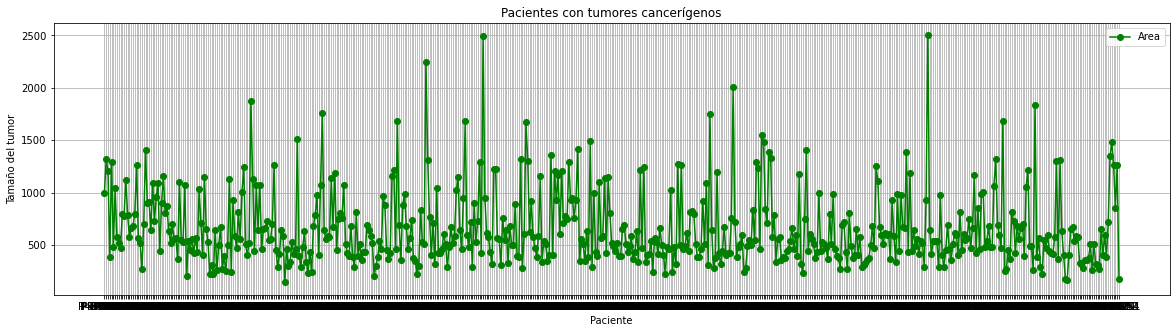

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(BCancer['IDNumber'], BCancer['Area'],
         color='green', marker='o', label='Area')
plt.xlabel('Paciente')
plt.ylabel('Tamaño del tumor')
plt.title('Pacientes con tumores cancerígenos')
plt.grid(True)
plt.legend()
plt.show()


## 3) Selección de características


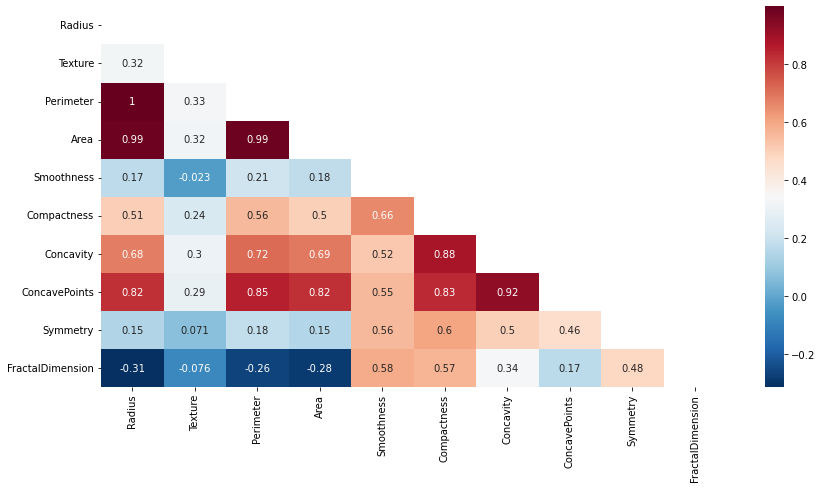

In [5]:
plt.figure(figsize=(14, 7))
MatrizInf = np.triu(BCancer.corr())
sns.heatmap(BCancer.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()


## Variables seleccionadas:

1. Textura [Posición 3]
2. Area [Posición 5]
3. Smoothness [Posición 6]
4. Compactness [Posición 7]
5. Symmetry [Posición 10]
6. FractalDimension [Posición 11]
7. Perimeter [Posición 4] -Para calcular el área del tumor-


# 4) Aplicación del algoritmo


In [7]:
from sklearn import linear_model # Para la regresión lineal / pip install scikit-learn
from sklearn.metrics import mean_squared_error, max_error, r2_score 
from sklearn import model_selection 


## Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)


In [8]:
X = np.array(BCancer[['Texture',
                    'Perimeter',
                    'Smoothness',
                    'Compactness',
                    'Symmetry',
                    'FractalDimension']])
pd.DataFrame(X)

# Tomando en cuenta todas las variables
#['Radius', 'Texture', 'Perimeter', 'Smoothness', 'Compactness',	'Concavity', 'ConcavePoints', 'Symmetry',	'FractalDimension']


,0,1,2,3,4,5
0,10.38,122.80,0.11840,0.27760,0.2419,0.07871
1,17.77,132.90,0.08474,0.07864,0.1812,0.05667
2,21.25,130.00,0.10960,0.15990,0.2069,0.05999
3,20.38,77.58,0.14250,0.28390,0.2597,0.09744
4,14.34,135.10,0.10030,0.13280,0.1809,0.05883
...,...,...,...,...,...,...
564,22.39,142.00,0.11100,0.11590,0.1726,0.05623
565,28.25,131.20,0.09780,0.10340,0.1752,0.05533
566,28.08,108.30,0.08455,0.10230,0.1590,0.05648
567,29.33,140.10,0.11780,0.27700,0.2397,0.07016


In [9]:
Y = np.array(BCancer[['Area']])
pd.DataFrame(Y)


,0
0,1001.0
1,1326.0
2,1203.0
3,386.1
4,1297.0
...,...
564,1479.0
565,1261.0
566,858.1
567,1265.0


## Se hace la división de los datos


In [10]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X, Y, test_size=0.2, random_state=1234, shuffle=True)
# Se deja un espacio de 20% para la prueba y un 80% para el entrenamiento


In [11]:
pd.DataFrame(X_train)
# pd.DataFrame(X_test)


,0,1,2,3,4,5
0,18.22,84.45,0.12180,0.16610,0.1709,0.07253
1,22.44,71.49,0.09566,0.08194,0.2030,0.06552
2,20.76,82.15,0.09933,0.12090,0.1735,0.07070
3,23.84,82.69,0.11220,0.12620,0.1905,0.06590
4,18.32,66.82,0.08142,0.04462,0.2372,0.05768
...,...,...,...,...,...,...
450,15.18,88.99,0.09516,0.07688,0.2110,0.05853
451,15.10,141.30,0.10010,0.15150,0.1973,0.06183
452,18.60,81.09,0.09965,0.10580,0.1925,0.06373
453,18.70,120.30,0.11480,0.14850,0.2092,0.06310


In [12]:
pd.DataFrame(Y_train)
# pd.DataFrame(Y_test)


,0
0,493.1
1,378.4
2,480.4
3,499.0
4,340.9
...,...
450,587.4
451,1386.0
452,481.9
453,1033.0


## Se entrena el modelo a través de Regresión Lineal Múltiple


In [13]:
RLMultiple = linear_model.LinearRegression()
RLMultiple.fit(X_train, Y_train)  # Se entrena el modelo


LinearRegression()

## Se genera el pronóstico


In [14]:
# Se genera el pronóstico
Y_Pronostico = RLMultiple.predict(X_test)
pd.DataFrame(Y_Pronostico)


,0
0,405.607887
1,334.291077
2,505.762398
3,207.726058
4,604.229256
...,...
109,394.439214
110,1107.202694
111,541.131191
112,570.702628


In [15]:
r2_score(Y_test, Y_Pronostico)  # 0.9769070115972408


0.9769070115972408

# 5) Obtención de los coeficientes, intercepto, error y Score


In [18]:
print('Coeficientes: \n', RLMultiple.coef_)
print('Intercepto: \n', RLMultiple.intercept_)
print("Residuo: %.4f" % max_error(Y_test, Y_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico))
# True devuelve MSE, False devuelve RMSE
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico, squared=False))
print('Score (Bondad de ajuste): %.4f' % r2_score(Y_test, Y_Pronostico))

print('\n')
print("Pronóstico del área del Tumor: Y =",RLMultiple.intercept_[0],"+", RLMultiple.coef_[0][0], "(Texture) + ", RLMultiple.coef_[0][1], "(Perimeter) + "
,RLMultiple.coef_[0][2], "(Smoothness) + ", RLMultiple.coef_[0][3], "(Compactness) + ",RLMultiple.coef_[0][4], "(Symmetry) + "
,RLMultiple.coef_[0][5], "(FractalDimension) + ", max_error(Y_test, Y_Pronostico))

Coeficientes: 
 [[ 6.86261446e-01  1.63885604e+01  2.50787388e+01 -1.40602548e+03
   1.46803422e+02  6.23269303e+03]]
Intercepto: 
 [-1140.33616115]
Residuo: 456.3649
MSE: 3083.2634
RMSE: 55.5271
Score (Bondad de ajuste): 0.9769


Pronóstico del área del Tumor: Y = -1140.3361611510427 + 0.686261445806786 (Texture) +  16.38856042005786 (Perimeter) +  25.078738765231375 (Smoothness) +  -1406.025479893373 (Compactness) +  146.80342202773474 (Symmetry) +  6232.6930342816995 (FractalDimension) +  456.3649459839594


# 6) Conformación del modelo de pronóstico


## a) Solo con las variables seleccionadas

Y = −1140.34 + 0.69(Texture) + 16.39(Perimeter) + 25.08(Smoothness) − 1406.03(Compactness) + 146.80(Symmetry) + 6232.69(FractalDimension) + 456.36

- Se tiene un Score de 0.9769, el cual indica que el pronóstico del Area del tumor se logrará con un 97.69% de efectividad.
- Además, los pronósticos del modelo final se alejan en promedio 3083.26 y 55.53 unidades del valor real, esto es, MSE y RMSE, respectivamente.


## b) Con todas las variables

Y = −976.18 − 35.08(Radius) + 0.48(Texture) + 20.79(Perimeter) − 169.89(Smoothness) − 1894.45(Compactness) + 232.74(Concavity) + 529.22(ConcavePoints) + 66.61(Symmetry) + 5716.43(FractalDimension) + 425.23

- Se tiene un Score de 0.9780, el cual indica que el pronóstico del Area del tumor se logrará con un 97.8% de efectividad.
- Además, los pronósticos del modelo final se alejan en promedio 2932.75 y 54.15 unidades del valor real, esto es, MSE y RMSE, respectivamente.


## 7) Nuevos pronósticos


In [18]:
AreaTumor = pd.DataFrame({'Texture': [18.32], 'Perimeter': [166.82], 'Smoothness': [0.08142], 
                        'Compactness': [0.04462], 'Symmetry': [0.2372], 'FractalDimension': [0.05768]})
RLMultiple.predict(AreaTumor)

# array([[300.94831572]])
# Tumor pequeño en comparación con los otros grupos de Pacientes
# Si se aumenta el perímetro ([166.82]), el tumor área del tumor se aumenta:
#array([[1939.80435773]])

C:\Users\johnc\anaconda3\envs\DeepLearning\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[1939.80435773]])